ASSIGNMENT 1


In [2]:
import pandas as pd

# Load Dataset

In [6]:
cereal_dataset=pd.read_csv("cereal.csv")

In [7]:
cereal_dataset

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50
4,Almond_Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,General Mills,C,110,2,1,250,0.0,21.0,3,3,60,25,1.0,0.75
70,Trix,General Mills,C,110,1,1,140,0.0,13.0,12,2,25,25,1.0,1.00
71,Wheat_Chex,Ralston Purina,C,100,3,1,230,3.0,17.0,3,1,115,25,1.0,0.67
72,Wheaties,General Mills,C,100,3,1,200,3.0,17.0,3,1,110,25,1.0,1.00


# Create a new column called 'Type of Cereal' and fill it up with the data from 'Cereal Name'

In [10]:
cereal_dataset['Type of Cereal'] = cereal_dataset['Cereal Name']

In [14]:
print(cereal_dataset.head)

<bound method NDFrame.head of                   Cereal Name    Manufacturer Type  Calories  Protein (g)  \
0                   100%_Bran         Nabisco    C        70            4   
1           100%_Natural_Bran     Quaker Oats    C       120            3   
2                    All-Bran        Kelloggs    C        70            4   
3   All-Bran_with_Extra_Fiber        Kelloggs    C        50            4   
4              Almond_Delight  Ralston Purina    C       110            2   
..                        ...             ...  ...       ...          ...   
69                    Triples   General Mills    C       110            2   
70                       Trix   General Mills    C       110            1   
71                 Wheat_Chex  Ralston Purina    C       100            3   
72                   Wheaties   General Mills    C       100            3   
73        Wheaties_Honey_Gold   General Mills    C       110            2   

    Fat  Sodium  Dietary Fiber  Carbs  Sugars

# Function to categorize the cereal types

In [21]:
def categorize_cereal(name):
    categories = ['Bran', 'Wheat', 'Fiber', 'Protein', 'Crunch', 'Corn', 'Nut', 'Rice']
    for category in categories:
        if category.lower() in name.lower():
            return category
    return 'Other'   

# Applying the function to the 'Type of Cereal' column

In [22]:
cereal_dataset['Name of Cereal'] = cereal_dataset['Type of Cereal'].apply(categorize_cereal)

In [23]:
print(cereal_dataset.head)

<bound method NDFrame.head of                   Cereal Name    Manufacturer Type  Calories  Protein (g)  \
0                   100%_Bran         Nabisco    C        70            4   
1           100%_Natural_Bran     Quaker Oats    C       120            3   
2                    All-Bran        Kelloggs    C        70            4   
3   All-Bran_with_Extra_Fiber        Kelloggs    C        50            4   
4              Almond_Delight  Ralston Purina    C       110            2   
..                        ...             ...  ...       ...          ...   
69                    Triples   General Mills    C       110            2   
70                       Trix   General Mills    C       110            1   
71                 Wheat_Chex  Ralston Purina    C       100            3   
72                   Wheaties   General Mills    C       100            3   
73        Wheaties_Honey_Gold   General Mills    C       110            2   

    Fat  Sodium  Dietary Fiber  Carbs  Sugars

# Identifying Negative Values
This section returns a new DataFrame that includes only the numerical columns from cereal_dataset

In [26]:
negative_values = cereal_dataset.select_dtypes(include=['number']) < 0

# Replacing negative values with the median value for that column

In [27]:
for column in cereal_dataset.select_dtypes(include=['number']).columns:
    median_value = cereal_dataset[column].median()
    cereal_dataset[column] = cereal_dataset[column].apply(lambda x: median_value if x < 0 else x)

In [29]:
print(cereal_dataset.head)

<bound method NDFrame.head of                   Cereal Name    Manufacturer Type  Calories  Protein (g)  \
0                   100%_Bran         Nabisco    C        70            4   
1           100%_Natural_Bran     Quaker Oats    C       120            3   
2                    All-Bran        Kelloggs    C        70            4   
3   All-Bran_with_Extra_Fiber        Kelloggs    C        50            4   
4              Almond_Delight  Ralston Purina    C       110            2   
..                        ...             ...  ...       ...          ...   
69                    Triples   General Mills    C       110            2   
70                       Trix   General Mills    C       110            1   
71                 Wheat_Chex  Ralston Purina    C       100            3   
72                   Wheaties   General Mills    C       100            3   
73        Wheaties_Honey_Gold   General Mills    C       110            2   

    Fat  Sodium  Dietary Fiber  Carbs  Sugars

# Function to standardize nutritional information by weight

In [45]:
def standardize_by_weight(row):
    weight = row['Serving Size Weight']
    for col in cereal_dataset.columns:
        if col != 'Serving Size Weight' and cereal_dataset[col].dtype in ['float64', 'int64']:
            row[col] = row[col] / weight
    row['Serving Size Weight'] = 1
    return row
    

# Apply the function to the dataframe

In [46]:
cereal_dataset = cereal_dataset.apply(standardize_by_weight, axis=1)

In [48]:
print(cereal_dataset.head)

<bound method NDFrame.head of                   Cereal Name    Manufacturer Type  Calories  Protein (g)  \
0                   100%_Bran         Nabisco    C      70.0          4.0   
1           100%_Natural_Bran     Quaker Oats    C     120.0          3.0   
2                    All-Bran        Kelloggs    C      70.0          4.0   
3   All-Bran_with_Extra_Fiber        Kelloggs    C      50.0          4.0   
4              Almond_Delight  Ralston Purina    C     110.0          2.0   
..                        ...             ...  ...       ...          ...   
69                    Triples   General Mills    C     110.0          2.0   
70                       Trix   General Mills    C     110.0          1.0   
71                 Wheat_Chex  Ralston Purina    C     100.0          3.0   
72                   Wheaties   General Mills    C     100.0          3.0   
73        Wheaties_Honey_Gold   General Mills    C     110.0          2.0   

    Fat  Sodium  Dietary Fiber  Carbs  Sugars

# Function to categorize cereals as healthy or unhealthy

In [56]:
def categorize_health(row):
    if (row['Calories'] < 100 and row['Sodium'] < 150 and row['Sugars'] < 9 and
        row['Dietary Fiber'] > 3 and row['Protein (g)'] > 2):
        return 'Healthy'
    else:
        return 'Unhealthy'


# Apply the function to create the 'Healthiness' column

In [57]:
cereal_dataset['Healthiness'] = cereal_dataset.apply(categorize_health, axis=1)
print(cereal_dataset.head)

<bound method NDFrame.head of                   Cereal Name    Manufacturer Type  Calories  Protein (g)  \
0                   100%_Bran         Nabisco    C      70.0          4.0   
1           100%_Natural_Bran     Quaker Oats    C     120.0          3.0   
2                    All-Bran        Kelloggs    C      70.0          4.0   
3   All-Bran_with_Extra_Fiber        Kelloggs    C      50.0          4.0   
4              Almond_Delight  Ralston Purina    C     110.0          2.0   
..                        ...             ...  ...       ...          ...   
69                    Triples   General Mills    C     110.0          2.0   
70                       Trix   General Mills    C     110.0          1.0   
71                 Wheat_Chex  Ralston Purina    C     100.0          3.0   
72                   Wheaties   General Mills    C     100.0          3.0   
73        Wheaties_Honey_Gold   General Mills    C     110.0          2.0   

    Fat  Sodium  Dietary Fiber  Carbs  Sugars

# Calculate the percentage of healthy cereals by manufacturer

In [63]:
healthy_counts = cereal_dataset.groupby(['Manufacturer', 'Healthiness']).size().unstack(fill_value=0)
healthy_percentage = (healthy_counts['Healthy'] / healthy_counts.sum(axis=1)) * 100

In [64]:
print(healthy_percentage)

Manufacturer
American Home Food Products     0.000000
General Mills                   0.000000
Kelloggs                        4.347826
Nabisco                        50.000000
Post                            0.000000
Quaker Oats                     0.000000
Ralston Purina                  0.000000
dtype: float64


In [66]:
# Create a composite health score
# Example: (High Protein + High Fiber + Low Sugar + Low Calories)
cereal_dataset['Health_Score'] = (
    cereal_dataset['Protein (g)'] * 2 +
    cereal_dataset['Dietary Fiber'] * 2 -
    cereal_dataset['Sugars'] -
    cereal_dataset['Calories'] / 10
)

In [68]:
# Calculate average, minimum, and maximum health scores for healthy vs. unhealthy cereals
health_stats = cereal_dataset.groupby('Healthiness')['Health_Score'].agg(['mean', 'min', 'max'])

print(health_stats)

                  mean        min   max
Healthiness                            
Healthy      13.352410   2.409639  31.0
Unhealthy    -9.107848 -22.000000  14.0


In [70]:
# Calculate average, minimum, and maximum ratings for each type of cereal
type_stats = cereal_dataset.groupby('Type of Cereal')['Health_Score'].agg(['mean', 'min', 'max'])

print(type_stats)

                           mean   min   max
Type of Cereal                             
100%_Bran                  15.0  15.0  15.0
100%_Natural_Bran         -10.0 -10.0 -10.0
All-Bran                   14.0  14.0  14.0
All-Bran_with_Extra_Fiber  31.0  31.0  31.0
Almond_Delight            -13.0 -13.0 -13.0
...                         ...   ...   ...
Triples                   -10.0 -10.0 -10.0
Trix                      -21.0 -21.0 -21.0
Wheat_Chex                 -1.0  -1.0  -1.0
Wheaties                   -1.0  -1.0  -1.0
Wheaties_Honey_Gold       -13.0 -13.0 -13.0

[74 rows x 3 columns]


In [72]:
import matplotlib.pyplot as plt

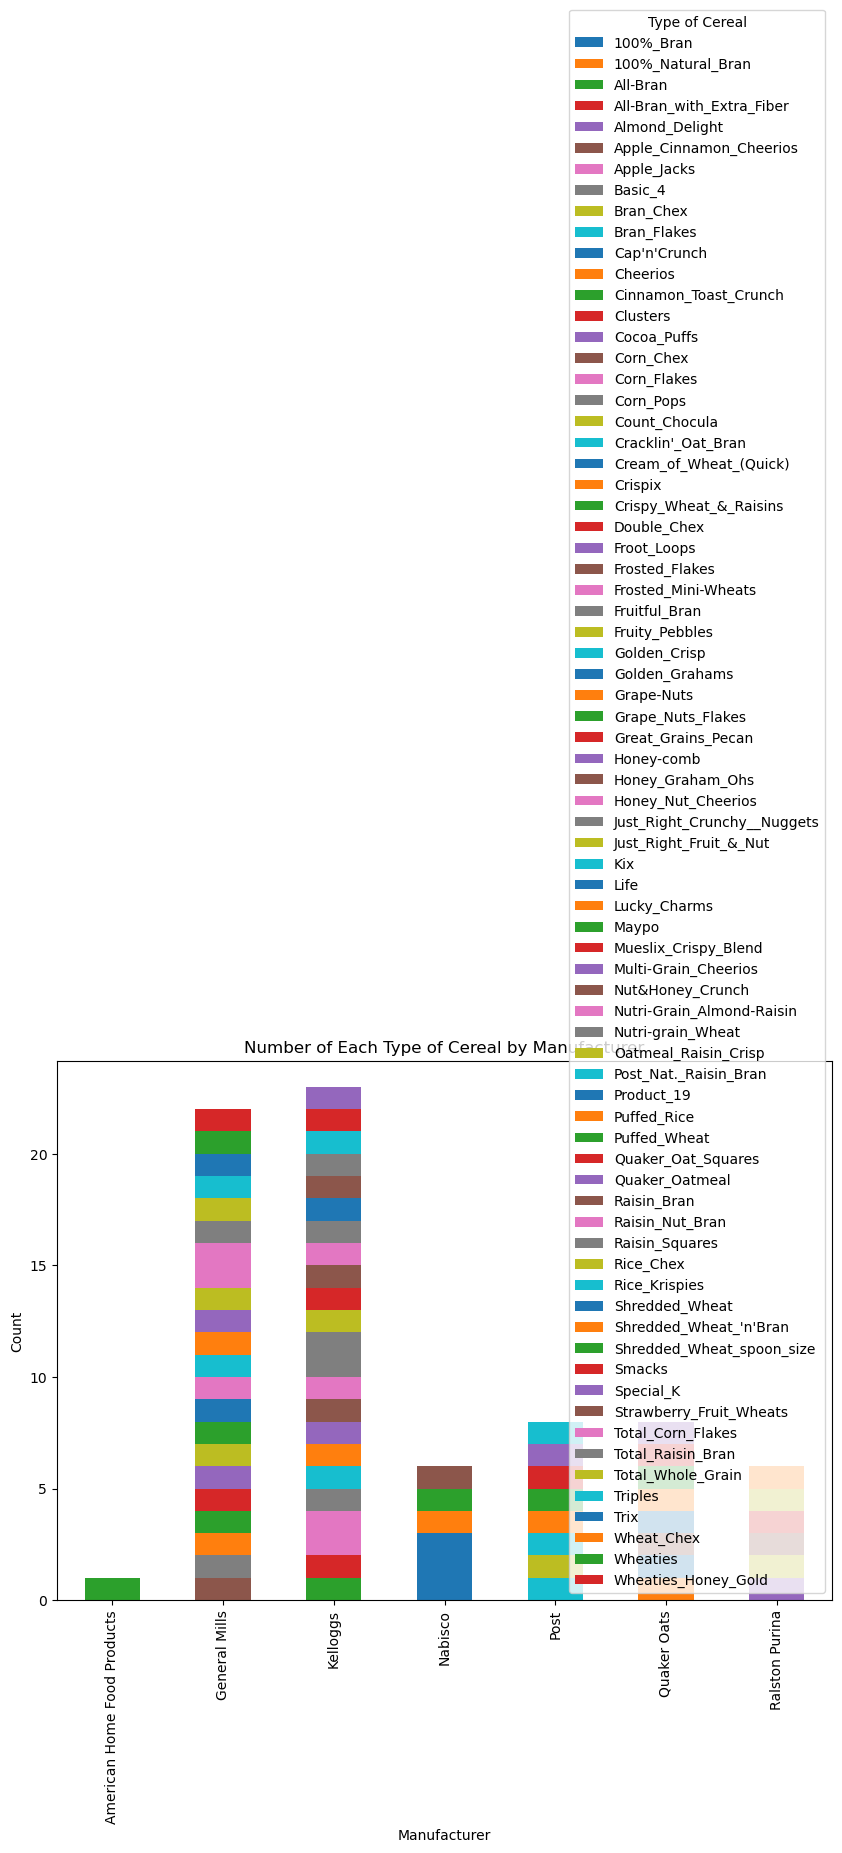

In [73]:
# Create a stacked bar chart
type_counts = cereal_dataset.groupby(['Manufacturer', 'Type of Cereal']).size().unstack(fill_value=0)
type_counts.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Number of Each Type of Cereal by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.legend(title='Type of Cereal')
plt.show()

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

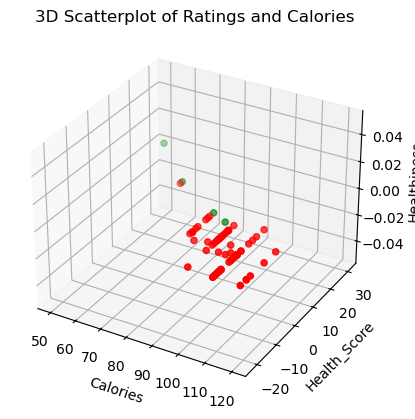

In [76]:
# Creating a 3D scatterplot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = {'Healthy': 'green', 'Unhealthy': 'red'}
ax.scatter(cereal_dataset['Calories'], cereal_dataset['Health_Score'], c=cereal_dataset['Healthiness'].map(colors))

ax.set_xlabel('Calories')
ax.set_ylabel('Health_Score')
ax.set_zlabel('Healthiness')

plt.title('3D Scatterplot of Ratings and Calories')
plt.show()

In [79]:
# Identifying the shelf with the most healthy cereals
healthy_shelf_counts = cereal_dataset[cereal_dataset['Healthiness'] == 'Healthy']['Display Shelf'].value_counts()

print(healthy_shelf_counts)

Display Shelf
3.000000    2
1.204819    1
1.000000    1
Name: count, dtype: int64


# CONCLUSION

The cereal dataset provides insights into the nutritional profiles, categorization, and distribution of cereals. It categorizes cereals into various types, such as Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice, and Other. The data also categorizes cereals as 'Healthy' or 'Unhealthy' based on specific nutritional criteria. Shelf placement is crucial for product visibility and consumer choice. Manufacturer analysis shows that certain manufacturers produce a higher proportion of healthy cereals. Nutritional standardization helps make comparisons more accurate. Average, minimum, and maximum ratings for healthy vs. unhealthy cereals and each type of cereal are calculated. Visualizations like stacked bar charts and 3D scatterplots help visualize the diversity of products offered by each company. The analysis highlights the importance of nutritional content, manufacturer contributions to healthy options, and the impact of shelf placement on consumer choices. Consumers can benefit from being aware of the nutritional content and healthiness of cereals, potentially leading to healthier choices. Manufacturer strategies can leverage this information in marketing strategies to appeal to health-conscious consumers.